In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0= pd.read_csv("autoscout_missing_value.csv")


In [3]:
df = df0.copy()

In [4]:
# Outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()

In [5]:
# Outliers Dropping
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]

In [6]:
outliers(df, "price")

479

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


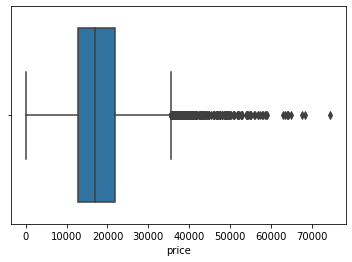

In [8]:
sns.boxplot(df["price"]);

In [9]:
# Calculating of limits
def limit(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    print("Lower Limit:",lower_lim)
    print("Upper limit:", upper_lim)

In [10]:
limit(df, "price")

Lower Limit: -725.0
Upper limit: 35475.0


In [11]:
dropping_of_outliers(df, "price")

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15791    33990
15792    33975
15793    33990
15794    33975
15795    34200
Name: price, Length: 15440, dtype: int64

In [13]:
df.corr(method ='pearson').index

Index(['price', 'km', 'hp', 'previous_owners', 'nr_of_doors', 'nr_of_seats',
       'displacement', 'weight', 'emission_label', 'gears', 'comb_consumption',
       'age', 'cc_index', 'em_index', 'ex_index', 'ss_index', 'leather_'],
      dtype='object')